# Küresel Plastik Atık Geri Dönüşümü: Ülkeler Arası Karşılaştırmalar ve Türkiye'nin Durumunun Yorumu

## Veri Seti Hakkında

Kullanılan veri seti 165 ülkenin plastik atık üretim miktarını, geri dönüşüm oranlarını, kişi başı plastik atık üretimini, ana atık kaynaklarını ve kıyı atık risk seviyelerini içermektedir.

| Değişken | Açıklama |
|----------|----------|
| Country | Ülke adı |
| Total_Plastic_Waste_MT | Toplam plastik atık miktarı (Milyon Ton) |
| Main_Sources | Başlıca plastik atık kaynakları |
| Recycling_Rate | Geri dönüşüm oranı (%) |
| Per_Capita_Waste_KG | Kişi başı atık miktarı (kg) |
| Coastal_Waste_Risk | Kıyı atık riski (High, Medium, Low) |

# Temel Bulgular:

Küresel Geri Dönüşüm: Çoğu ülkenin düşük-orta 
geri dönüşüm oranlarına sahip olduğu.
En Büyük Atık Üreticileri: Çin ve ABD'nin öne çıktığı, 
Türkiye'nin bu listede olmadığı.
Ana Atık Kaynağı: Tüketici ambalajlarının yaygınlığı, 
Türkiye'nin de bu eğilimde olduğu.
Kişi Başı Atık vs. Geri Dönüşüm: Belirgin bir doğrusal ilişki olmadığı, 
Türkiye'nin düşük geri dönüşümle orta düzeyde kişi başı atığa sahip olduğu.
Kıyı Atık Riski: Yüksek riskli ülkelerde genellikle düşük geri dönüşüm oranları, 
Türkiye'nin de bu kategoride yer aldığı.
Türkiye Özeti: Orta düzeyde atık üretimi, düşük geri dönüşüm oranı, 
yüksek kıyı riski ve ana kaynak olarak tüketici ambalajları.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dosya_yolu = 'Plastic Waste Around The World.csv'
df = pd.read_csv(dosya_yolu)

df = df.rename(columns={
    "Country": "Ülke",
    "Total_Plastic_Waste_MT": "Toplam Plastik Atık (MT)",
    "Main_Sources": "Ana Kaynak",
    "Recycling_Rate": "Geri Dönüşüm Yüzdesi",
    "Per_Capita_Waste_KG": "Kişi Başına Düşen Atık Miktarı (KG)",
    "Coastal_Waste_Risk": "Kıyı Atığı Riski"
})
df["Ana Kaynak"].unique()
df = df.replace({'Packaging_Industrial':'Ambalaj Endüstrisi ', 'Packaging_Consumer':'Ambalaj Tüketimi', 
                     'Consumer_Goods':'Tüketim Ürünleri', 'Packaging_Electronics':'Ambalaj Elektroniği', 'Automotive_Packaging':'Otomotiv Ambalajı',
                     'Consumer_Packaging':'Tüketiciye Yönelik Ambalaj' ,'Food_Packaging':'Gıda Ambalajı', 'Industrial_Consumer':'Endüstriyel Tüketim',
                     'Electronics_Packaging':'Elektronik Ambalajı', 'Industrial_Packaging':'Endüstriyel Ambalaj','High':'Yüksek','Medium':'Orta','Low':'Düşük',
                      'Very_High':'Çok Yüksek'})
for col in df.columns:
    print(f"'{col}'")

print(df)



'Ülke'
'Toplam Plastik Atık (MT)'
'Ana Kaynak'
'Geri Dönüşüm Yüzdesi'
'Kişi Başına Düşen Atık Miktarı (KG)'
'Kıyı Atığı Riski'
                 Ülke  Toplam Plastik Atık (MT)                  Ana Kaynak  \
0               China                     59.08         Ambalaj Endüstrisi    
1       United States                     42.02            Ambalaj Tüketimi   
2               India                     26.33            Tüketim Ürünleri   
3               Japan                      7.99         Ambalaj Elektroniği   
4             Germany                      6.28           Otomotiv Ambalajı   
..                ...                       ...                         ...   
160  Marshall Islands                      0.01  Tüketiciye Yönelik Ambalaj   
161        Micronesia                      0.01  Tüketiciye Yönelik Ambalaj   
162             Palau                      0.01  Tüketiciye Yönelik Ambalaj   
163            Tuvalu                      0.01  Tüketiciye Yönelik Ambalaj   
164 

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ülke                                 165 non-null    object 
 1   Toplam Plastik Atık (MT)             165 non-null    float64
 2   Ana Kaynak                           165 non-null    object 
 3   Geri Dönüşüm Yüzdesi                 165 non-null    float64
 4   Kişi Başına Düşen Atık Miktarı (KG)  165 non-null    float64
 5   Kıyı Atığı Riski                     165 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.9+ KB
None


In [31]:
dosya = 'CLASS.xlsx'
d = pd.read_excel(dosya)

In [32]:
d =  d.rename(columns={"Economy": "Ülke", "Income group": "Gelir Seviyesi"})
d["Ülke"] = d["Ülke"].str.strip()
df["Ülke"] = df["Ülke"].str.strip()

df_merged = pd.merge(df, d[["Ülke", "Gelir Seviyesi"]], how="left", on="Ülke")

print(df_merged.head())


            Ülke  Toplam Plastik Atık (MT)           Ana Kaynak  \
0          China                     59.08  Ambalaj Endüstrisi    
1  United States                     42.02     Ambalaj Tüketimi   
2          India                     26.33     Tüketim Ürünleri   
3          Japan                      7.99  Ambalaj Elektroniği   
4        Germany                      6.28    Otomotiv Ambalajı   

   Geri Dönüşüm Yüzdesi  Kişi Başına Düşen Atık Miktarı (KG) Kıyı Atığı Riski  \
0                  29.8                                 41.2           Yüksek   
1                  32.1                                127.5             Orta   
2                  11.5                                 19.3           Yüksek   
3                  84.8                                 63.2             Orta   
4                  56.1                                 75.6            Düşük   

        Gelir Seviyesi  
0  Upper middle income  
1          High income  
2  Lower middle income  
3         

In [33]:
df_merged["Gelir Seviyesi"].unique()
df_merged[df_merged["Gelir Seviyesi"].isna()][["Ülke"]]

,Ülke
7,Russia
13,Turkey
14,South Korea
20,Egypt
36,Czech Republic
51,Slovakia
83,Laos
86,Yemen
87,Syria
111,Cape Verde


In [34]:
income_level_dict = {
    "United States": "High income",
    "Japan": "High income",
    "Germany": "High income",
    "United Kingdom": "High income",
    "France": "High income",
    "Canada": "High income",
    "Italy": "High income",
    "South Korea": "High income",
    "Spain": "High income",
    "Netherlands": "High income",
    "Australia": "High income",
    "Saudi Arabia": "High income",
    "Belgium": "High income",
    "Sweden": "High income",
    "Austria": "High income",
    "Greece": "High income",
    "Czech Republic": "High income",
    "Portugal": "High income",
    "Hungary": "High income",
    "Denmark": "High income",
    "Finland": "High income",
    "Norway": "High income",
    "Ireland": "High income",
    "Singapore": "High income",
    "Israel": "High income",
    "Slovakia": "High income",
    "Lithuania": "High income",
    "Slovenia": "High income",
    "Kuwait": "High income",
    "Oman": "High income",
    "Latvia": "High income",
    "Estonia": "High income",
    "Bahrain": "High income",
    "Cyprus": "High income",
    "Luxembourg": "High income",
    "Malta": "High income",
    "Iceland": "High income",
    "Qatar": "High income",
    "Brunei": "High income",
    "New Caledonia": "High income",
    "Russia": "Upper middle income",
    "Turkey": "Upper middle income",
    "Egypt": "Lower middle income",
    "Laos": "Lower middle income",
    "Syria": "Lower middle income",
    "Cape Verde": "Lower middle income",
    "Sao Tome and Principe": "Lower middle income",
    "Ivory Coast": "Lower middle income",
    "Republic of Congo": "Lower middle income",
    "Kyrgyzstan": "Lower middle income",
    "East Timor": "Lower middle income",
    "Micronesia": "Lower middle income",
    "Yemen": "Low income",
    "Democratic Republic of Congo": "Low income",
    "Gambia": "Low income",
    "Western Sahara": "Low income",
}
df_merged["Gelir Seviyesi"] = df_merged.apply(
    lambda row: income_level_dict.get(row["Ülke"], row["Gelir Seviyesi"]),
    axis=1
)

In [35]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ülke                                 165 non-null    object 
 1   Toplam Plastik Atık (MT)             165 non-null    float64
 2   Ana Kaynak                           165 non-null    object 
 3   Geri Dönüşüm Yüzdesi                 165 non-null    float64
 4   Kişi Başına Düşen Atık Miktarı (KG)  165 non-null    float64
 5   Kıyı Atığı Riski                     165 non-null    object 
 6   Gelir Seviyesi                       165 non-null    object 
dtypes: float64(3), object(4)
memory usage: 9.2+ KB
None


In [36]:
df_merged = df_merged.replace({"High income":"Yüksek Gelir","Upper middle income":"Yüksek Orta Gelir","Lower middle income":"Düşük Orta Gelir",
                             "Low income":"Düşük Gelir"})

In [37]:
def categorize_income(gelir_seviyesi):
    if gelir_seviyesi == 'Yüksek Gelir':
        return 'Gelişmiş'
    elif gelir_seviyesi in ['Yüksek Orta Gelir', 'Düşük Orta Gelir']:
        return 'Gelişmekte Olan'
    else:
        return 'Gelişmemiş'

df_merged['Gelişmişlik Seviyesi'] = df_merged['Gelir Seviyesi'].apply(categorize_income)
df_merged.head()

,Ülke,Toplam Plastik Atık (MT),Ana Kaynak,Geri Dönüşüm Yüzdesi,Kişi Başına Düşen Atık Miktarı (KG),Kıyı Atığı Riski,Gelir Seviyesi,Gelişmişlik Seviyesi
0,China,59.08,Ambalaj Endüstrisi,29.8,41.2,Yüksek,Yüksek Orta Gelir,Gelişmekte Olan
1,United States,42.02,Ambalaj Tüketimi,32.1,127.5,Orta,Yüksek Gelir,Gelişmiş
2,India,26.33,Tüketim Ürünleri,11.5,19.3,Yüksek,Düşük Orta Gelir,Gelişmekte Olan
3,Japan,7.99,Ambalaj Elektroniği,84.8,63.2,Orta,Yüksek Gelir,Gelişmiş
4,Germany,6.28,Otomotiv Ambalajı,56.1,75.6,Düşük,Yüksek Gelir,Gelişmiş


In [38]:
df.head(10)

,Ülke,Toplam Plastik Atık (MT),Ana Kaynak,Geri Dönüşüm Yüzdesi,Kişi Başına Düşen Atık Miktarı (KG),Kıyı Atığı Riski
0,China,59.08,Ambalaj Endüstrisi,29.8,41.2,Yüksek
1,United States,42.02,Ambalaj Tüketimi,32.1,127.5,Orta
2,India,26.33,Tüketim Ürünleri,11.5,19.3,Yüksek
3,Japan,7.99,Ambalaj Elektroniği,84.8,63.2,Orta
4,Germany,6.28,Otomotiv Ambalajı,56.1,75.6,Düşük
5,Brazil,5.96,Tüketiciye Yönelik Ambalaj,1.2,28.1,Orta
6,Indonesia,5.85,Gıda Ambalajı,11.8,21.3,Çok Yüksek
7,Russia,5.84,Endüstriyel Tüketim,5.6,40.2,Orta
8,United Kingdom,5.03,Ambalaj Tüketimi,46.2,74.3,Düşük
9,France,4.98,Ambalaj Tüketimi,27.3,73.1,Düşük


Toplam Veri, Sütün ve Satır Sayısı Bilgileri

In [39]:
print("Veri Setinin Boyutu (Satır, Sütun):")
print(df.shape)
print("\n" + "="*50)


print("Toplam Veri Sayısı:")
print(df.size)
print("\n" + "="*50)

Veri Setinin Boyutu (Satır, Sütun):
(165, 6)

Toplam Veri Sayısı:
990



En Çok Plastik Atık Üreten 6 Ülke

C:\Users\seyma\AppData\Local\Temp\ipykernel_13284\2812892045.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




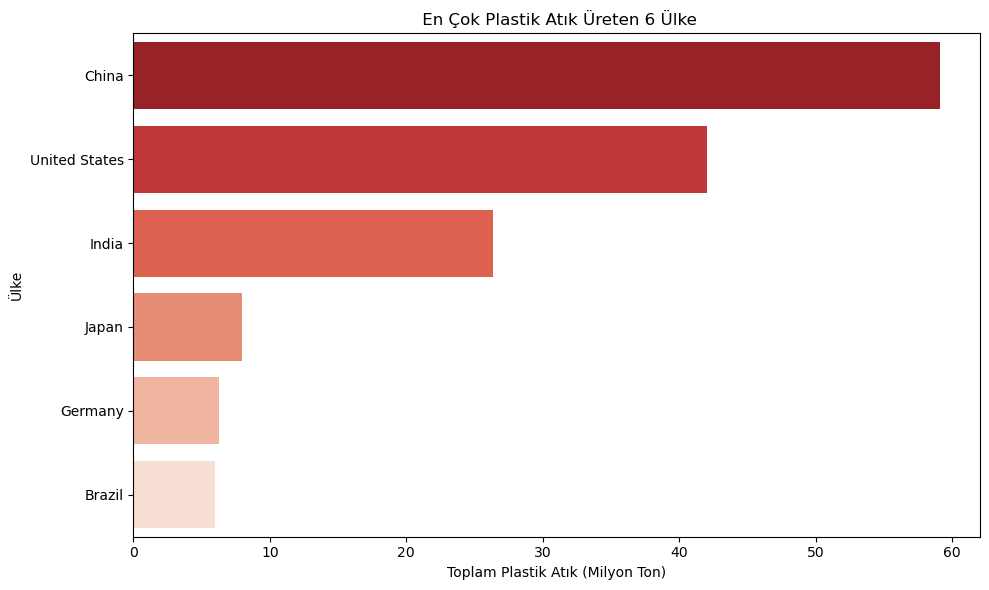

In [40]:
top10_waste = df.sort_values(by="Toplam Plastik Atık (MT)", ascending=False).head(6)

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_waste, x="Toplam Plastik Atık (MT)", y="Ülke", palette="Reds_r")
plt.title(" En Çok Plastik Atık Üreten 6 Ülke")
plt.xlabel("Toplam Plastik Atık (Milyon Ton)")
plt.ylabel("Ülke")
plt.tight_layout()
plt.show()

Korelasyon Analizi

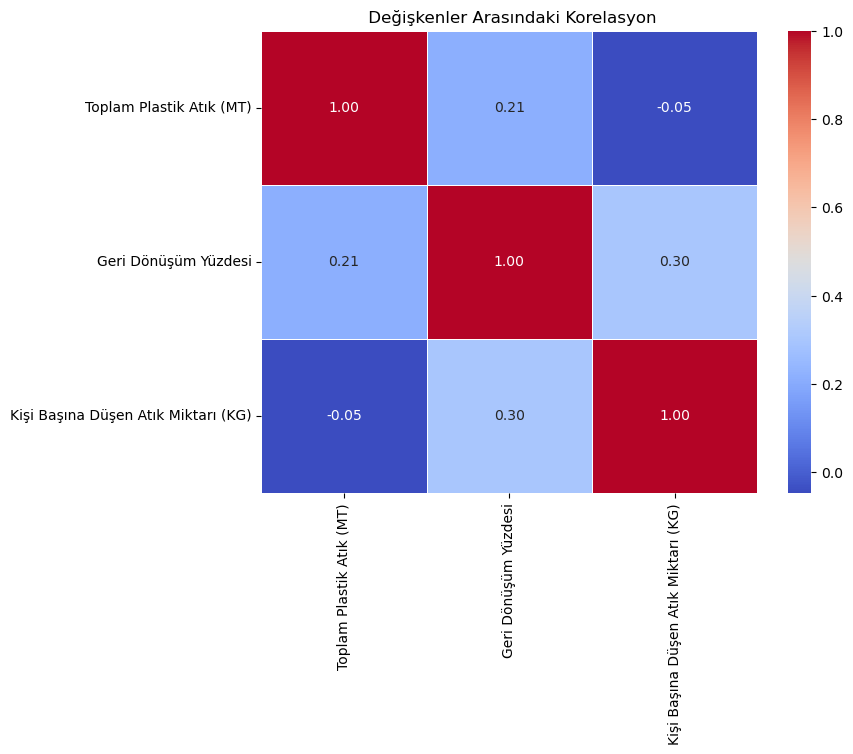

In [41]:
import numpy as np
correlation_matrix = df[['Toplam Plastik Atık (MT)','Geri Dönüşüm Yüzdesi','Kişi Başına Düşen Atık Miktarı (KG)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap( correlation_matrix, annot=True,cmap="coolwarm",linewidths=0.5,fmt=".2f")
plt.title(" Değişkenler Arasındaki Korelasyon")
plt.show()

Ülkelerin Ana Plastik Atık Kaynaklarının Dağılımı

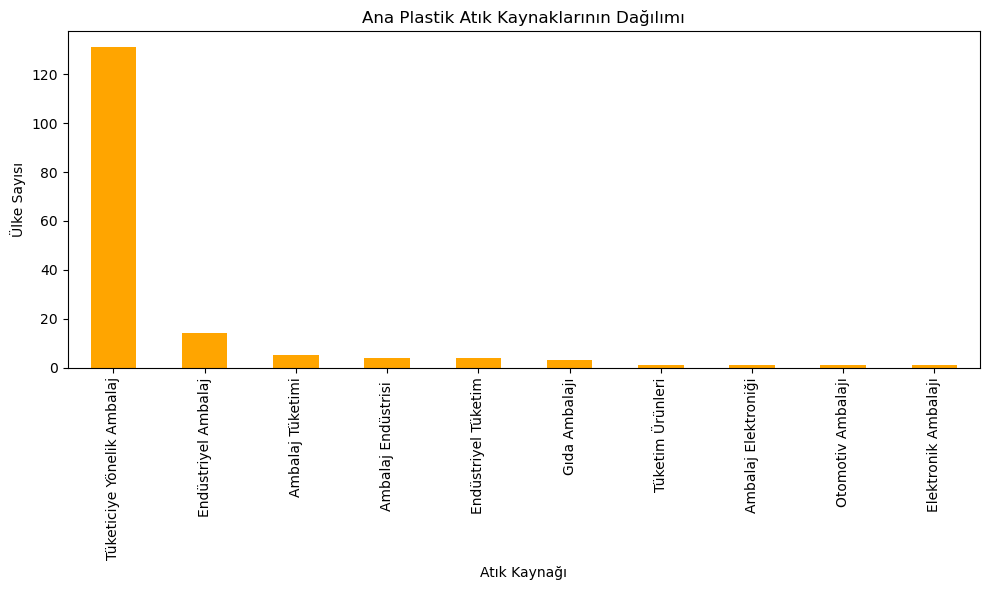

In [42]:
plt.figure(figsize=(10, 6))
df["Ana Kaynak"].value_counts().plot(kind="bar", color="orange")
plt.title("Ana Plastik Atık Kaynaklarının Dağılımı")
plt.xlabel("Atık Kaynağı")
plt.ylabel("Ülke Sayısı")
plt.tight_layout()
plt.show()

Toplam Plastik Atık Ve Geri Dönüşüm Oranı İlişkisi

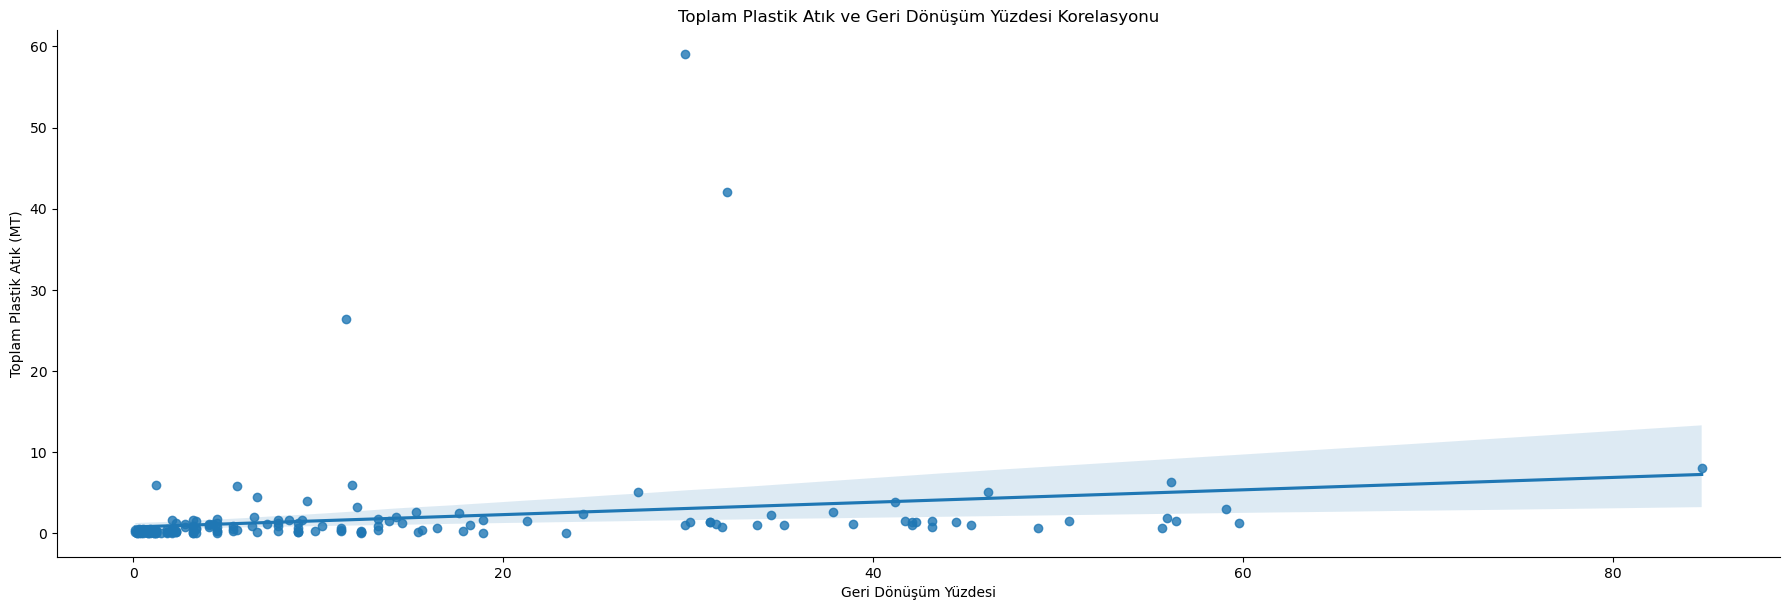

In [43]:
sns.lmplot(
    data=df,
    x="Geri Dönüşüm Yüzdesi",
    y="Toplam Plastik Atık (MT)",
    height=6,
    aspect=3
)
plt.title("Toplam Plastik Atık ve Geri Dönüşüm Yüzdesi Korelasyonu")
plt.show()

In [44]:
#Bu grafikte Toplam Plastik Atık ve Geri dönüşüm Yüzdesi arasında pozitif bir korelasyon olduğunu görebiliriz.

 Harita Üzerinde Plastik Atık Yoğunluğu (Plotly ile)

In [45]:

import plotly.express as px

df["iso_alpha"] = df["Ülke"]  
fig = px.choropleth(
    df, 
    locations="iso_alpha", 
    locationmode="country names",
    color="Toplam Plastik Atık (MT)",
    hover_name="Ülke",
    color_continuous_scale="Reds",
    title="Ülkelere Göre Plastik Atık Miktarı (Milyon Ton)")
fig.show()

En yüksek ve En düşük geri dönüşüm oranına sahip ilk 20 ülkeyi çubuk grafiğiyle gösterme ve Gelişim Seviyesine göre dağılımını inceleme

C:\Users\seyma\AppData\Local\Temp\ipykernel_13284\3519130667.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




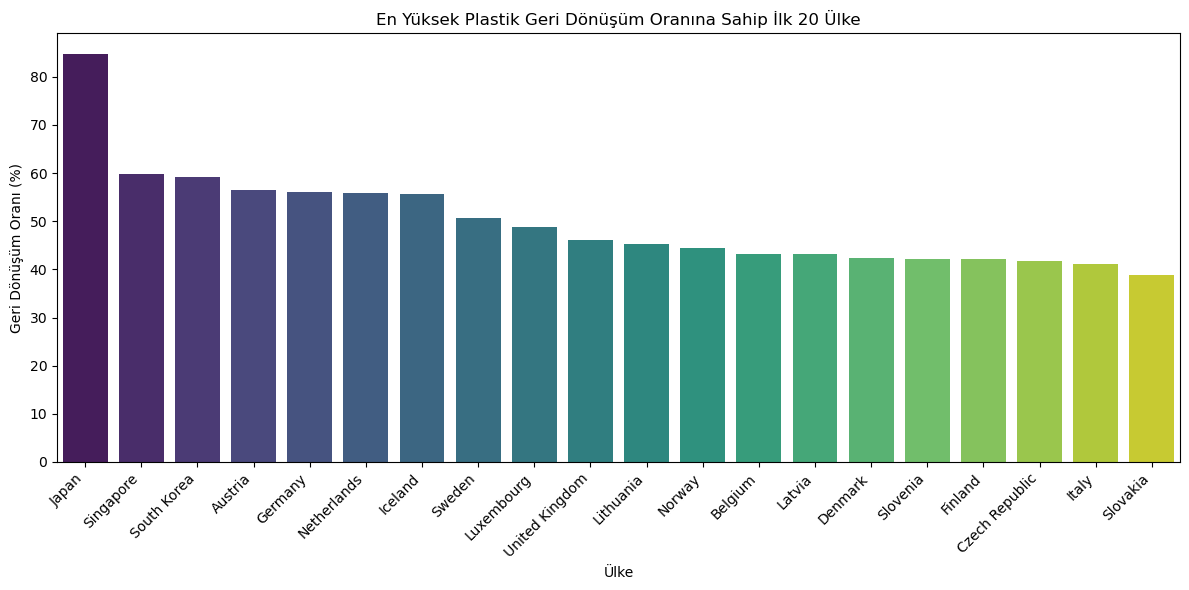

In [46]:
df_sorted = df.sort_values(by='Geri Dönüşüm Yüzdesi', ascending=False)
top_20_recycling = df_sorted.head(20)


plt.figure(figsize=(12, 6))
sns.barplot(x='Ülke', y='Geri Dönüşüm Yüzdesi', data=top_20_recycling, palette='viridis')
plt.title('En Yüksek Plastik Geri Dönüşüm Oranına Sahip İlk 20 Ülke')
plt.xlabel('Ülke')
plt.ylabel('Geri Dönüşüm Oranı (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\seyma\AppData\Local\Temp\ipykernel_13284\2246889959.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




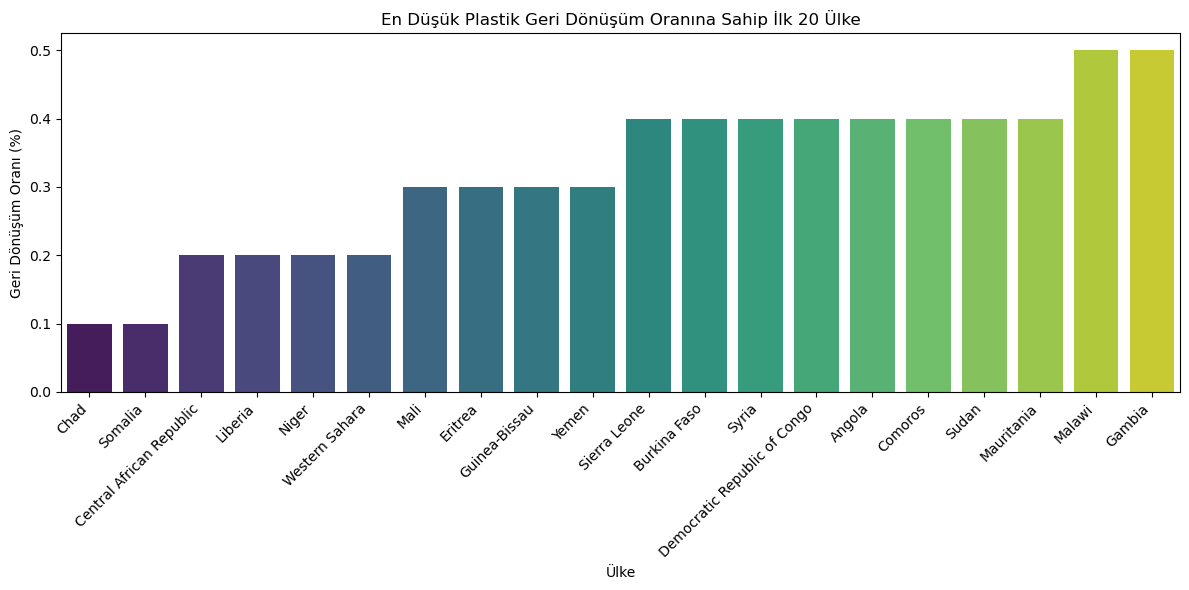

In [47]:
df_sorted_2 = df.sort_values(by='Geri Dönüşüm Yüzdesi', ascending=True)
least_20_recycling = df_sorted_2.head(20)


plt.figure(figsize=(12, 6))
sns.barplot(x='Ülke', y='Geri Dönüşüm Yüzdesi', data=least_20_recycling, palette='viridis')
plt.title('En Düşük Plastik Geri Dönüşüm Oranına Sahip İlk 20 Ülke')
plt.xlabel('Ülke')
plt.ylabel('Geri Dönüşüm Oranı (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Ülke Sayısı')

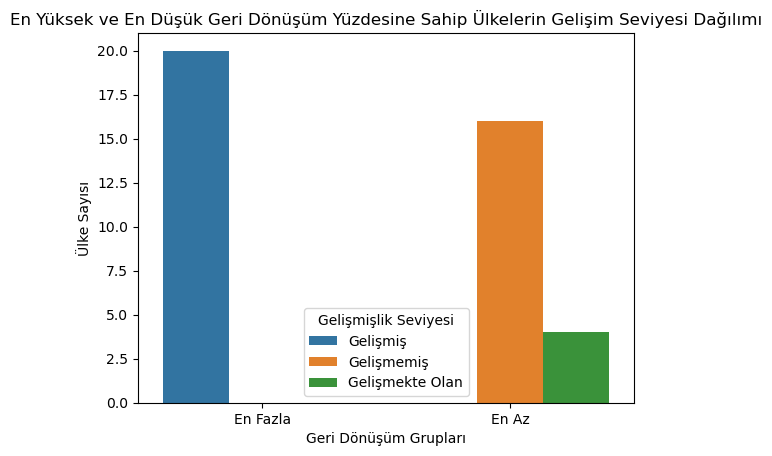

In [48]:
top_20_recycling = df_merged[df_merged["Ülke"].isin(top_20_recycling["Ülke"])].copy()
least_20_recycling = df_merged[df_merged["Ülke"].isin(least_20_recycling["Ülke"])].copy()

top_20_recycling["Group"] = "En Fazla"
least_20_recycling["Group"] = "En Az"

toplam = pd.concat([top_20_recycling, least_20_recycling], ignore_index=True)
sns.countplot(data=toplam, x='Group', hue='Gelişmişlik Seviyesi')
plt.title("En Yüksek ve En Düşük Geri Dönüşüm Yüzdesine Sahip Ülkelerin Gelişim Seviyesi Dağılımı")
plt.xlabel("Geri Dönüşüm Grupları")
plt.ylabel("Ülke Sayısı")

In [49]:
#Yukarıdaki grafiklere baktığımızda geri dönüşüm yüzdesinin en fazla olduğu ülkelerin gelişmişlik düzeyinin yüksek olduğunu,
#geri dönüşüm yüzdesinin en az olduğu ülkelerin çoğunluğunuysa gelişmemiş ülkelerin oluşturduğunu çıkarabiliriz.

Kıyı atık riskine göre gruplandırma ve ortalama geri dönüşüm oranlarını hesaplama/ Pasta Grafiği



Ortalama Geri Dönüşüm Oranları (Kıyı Atığı Riskine Göre):
Kıyı Atığı Riski
Orta          19.781818
Düşük         19.662963
Çok Yüksek     9.850000
Yüksek         5.498649
Name: Geri Dönüşüm Yüzdesi, dtype: float64


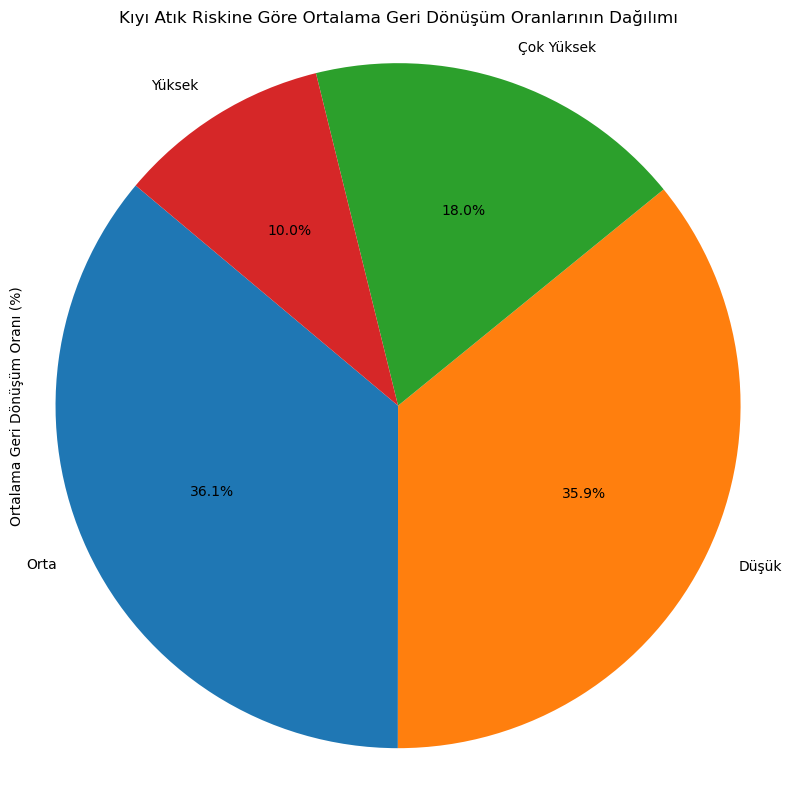

In [50]:
average_recycling_by_risk = df.groupby('Kıyı Atığı Riski')['Geri Dönüşüm Yüzdesi'].mean().sort_values(ascending=False)
print("\nOrtalama Geri Dönüşüm Oranları (Kıyı Atığı Riskine Göre):")
print(average_recycling_by_risk)

plt.figure(figsize=(8, 8))
plt.pie(average_recycling_by_risk, labels=average_recycling_by_risk.index, autopct='%1.1f%%', startangle=140)
plt.title('Kıyı Atık Riskine Göre Ortalama Geri Dönüşüm Oranlarının Dağılımı')
plt.ylabel('Ortalama Geri Dönüşüm Oranı (%)') # Y ekseni etiketi eklendi
plt.axis('equal')
plt.tight_layout()
plt.show()

Geri Dönüşüm Oranı ve Kıyı Atık Riski Box Plot

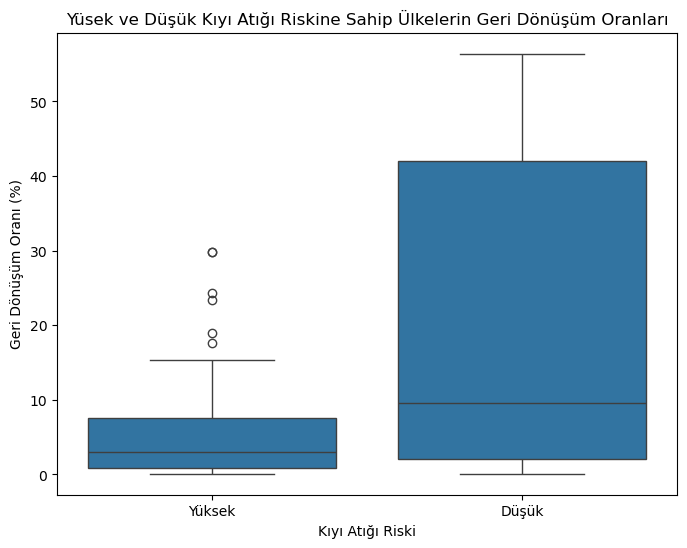

In [51]:
yuksek_risk_df = df[df['Kıyı Atığı Riski'] == 'Yüksek']
dusuk_risk_df = df[df['Kıyı Atığı Riski'] == 'Düşük']

plt.figure(figsize=(8, 6))
sns.boxplot(x='Kıyı Atığı Riski', y='Geri Dönüşüm Yüzdesi', data=pd.concat([yuksek_risk_df, dusuk_risk_df]),
            order=['Yüksek', 'Düşük']) 
plt.title(f'{'Yüsek'} ve {'Düşük'} Kıyı Atığı Riskine Sahip Ülkelerin Geri Dönüşüm Oranları')
plt.xlabel('Kıyı Atığı Riski')
plt.ylabel('Geri Dönüşüm Oranı (%)')
plt.show()


Geri Dönüşüm Oranı Dağılımını Histogram Grafği İle Gösterme

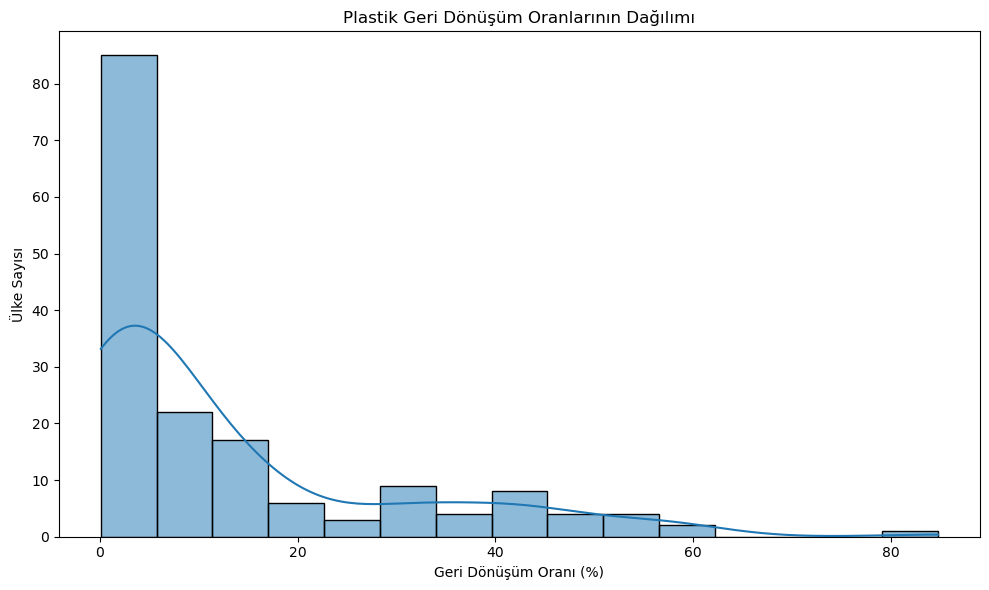

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Geri Dönüşüm Yüzdesi'], bins=15, kde=True) 
plt.title('Plastik Geri Dönüşüm Oranlarının Dağılımı')
plt.xlabel('Geri Dönüşüm Oranı (%)')
plt.ylabel('Ülke Sayısı')
plt.tight_layout()
plt.show()

Toplam Plastik Atık Üretimi ve Geri Dönüşüm İlişkisini Saçılım Grafiği İle Gösterme

C:\Users\seyma\AppData\Local\Temp\ipykernel_13284\570257145.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




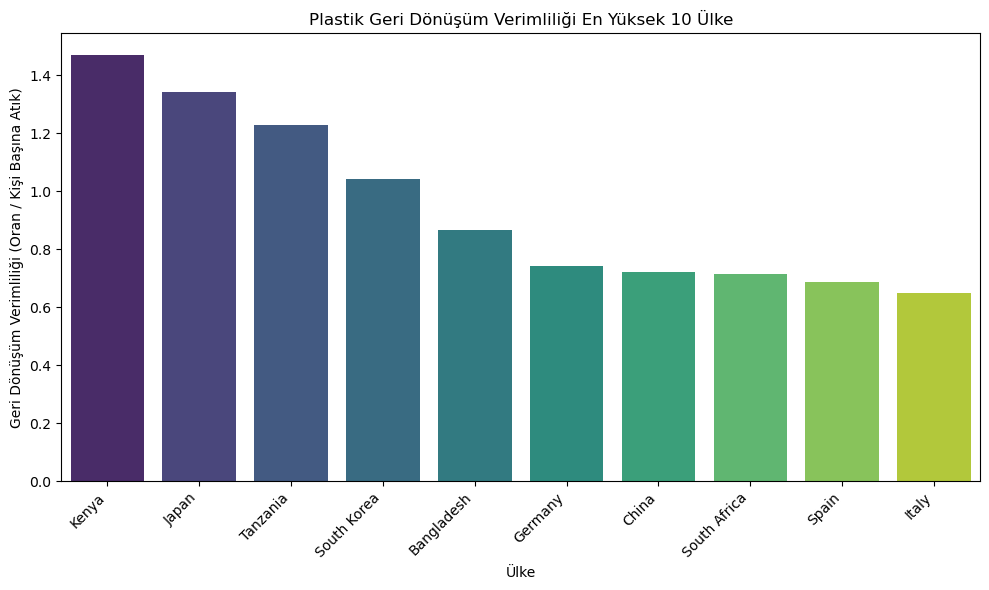

In [53]:
df["Plastik Geri Dönüşüm Verimliliği"] = df["Geri Dönüşüm Yüzdesi"] / df["Kişi Başına Düşen Atık Miktarı (KG)"]
top_efficient = df.sort_values(by="Plastik Geri Dönüşüm Verimliliği", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_efficient, x="Ülke", y="Plastik Geri Dönüşüm Verimliliği", palette="viridis")
plt.title("Plastik Geri Dönüşüm Verimliliği En Yüksek 10 Ülke")
plt.xlabel("Ülke")
plt.ylabel("Geri Dönüşüm Verimliliği (Oran / Kişi Başına Atık)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Türkiye'nin Plastik Atık Üretimi, Geri Dönüşümündeki Yeri

In [54]:
turkiye_verisi = df[df['Ülke'] == 'Turkey']
turkiye_verisi2 = df_merged[df_merged['Ülke'] == 'Turkey']
ulke = turkiye_verisi['Ülke'].iloc[0]
toplam_atik = turkiye_verisi['Toplam Plastik Atık (MT)'].iloc[0]
kaynaklar = turkiye_verisi['Ana Kaynak'].iloc[0]
geri_donusum_orani = turkiye_verisi['Geri Dönüşüm Yüzdesi'].iloc[0]
kisi_basi_atik = turkiye_verisi['Kişi Başına Düşen Atık Miktarı (KG)'].iloc[0]
kiyi_riski = turkiye_verisi['Kıyı Atığı Riski'].iloc[0]
gelismislik_seviyesi = turkiye_verisi2['Gelişmişlik Seviyesi'].iloc[0]
verimlilik = turkiye_verisi['Plastik Geri Dönüşüm Verimliliği'].iloc[0]

print("Türkiye'nin Verileri:")
print(f"Ülke: {ulke}")
print(f"Toplam Plastik Atık (Milyon Ton): {toplam_atik}")
print(f"Ana Kaynaklar: {kaynaklar}")
print(f"Geri Dönüşüm Oranı (%): {geri_donusum_orani}")
print(f"Kişi Başına Düşen Atık (KG): {kisi_basi_atik}")
print(f"Kıyı Atık Riski: {kiyi_riski}")
print(f"Gelişmişlik Seviyesi: {gelismislik_seviyesi} Ülke")
print(f"Plastik Geri Dönüşüm Verimliliği: {verimlilik}")

Türkiye'nin Verileri:
Ülke: Turkey
Toplam Plastik Atık (Milyon Ton): 3.21
Ana Kaynaklar: Tüketiciye Yönelik Ambalaj
Geri Dönüşüm Oranı (%): 12.1
Kişi Başına Düşen Atık (KG): 38.5
Kıyı Atık Riski: Yüksek
Gelişmişlik Seviyesi: Gelişmekte Olan Ülke
Plastik Geri Dönüşüm Verimliliği: 0.3142857142857143


In [55]:
#Plastik Geri Dönüşüm verimliliği 0.0 ve 1.4 arasında 0.3 olarak düşük gözükmektedir.

# Sonuç ve Öneriler:

Genel: Küresel düzeyde geri dönüşüm altyapısının geliştirilmesi, atık azaltma ve döngüsel ekonomi uygulamalarının yaygınlaştırılması gerekliliği.
Türkiye Özel: Geri dönüşüm oranlarını artırmaya yönelik politikalar, tüketici bilinçlendirme, kıyı bölgelerinde atık yönetiminin 
iyileştirilmesi ve döngüsel ekonomi modeline geçişin desteklenmesi.